# CONVOLUTIONAL NEURAL NETWORKS FOR IMAGE CLASSIFICATION

In this example we are going to implement a typical deep convolutional neural network for image classification by using keras API.

For this exercise we will use a 70000 images dataset with ten different duds (T-shirt, Pants, Jersey, Dress, Coat, Sandal, Shirt, Trainers, Bag, Shoe). The main goal of the network will be learning to differentiate and classify them properly.


First thing is importing keras library

In [1]:
import keras

Using TensorFlow backend.


Then we will import the fashion_mnist dataset:

In [2]:
from keras.datasets import fashion_mnist 

Next step will be importing different CNN layers we will use:

In [3]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

We will import the Dense layer, Activation (to which we will indicate the activation function to use), Flatten (it generates a vector. That is, it flattens the data that arrives in a single column vector), the layer to make the convolutions, Conv2D , and a layer to do the max pooling which is MaxPooling2D

After defining the layers we are going to import the model, in this case sequentially. In this case it is because the data will go from one layer to the next, sequentially

In [4]:
from keras.models import Sequential

Another important issue is labels. Remember that we are in supervised training and we have the data labeled. That is, we know the assigned class (the type of clothes) during the training process.

Now, these classes go from 0 to 9 (remember that we have 10 classes) and we need to generate one hot vectors so that in the output, there is always a 1 in the corresponding class and a 0 in the rest of the classes. Remember that the model will return a probability between 0 and 1 at the output, so to calculate the error we will need to normalize the values of the classes also between 0 and 1

To achieve this we are going to import the to_categorical function that will transform the output labels to vectors between 0 and 1:

In [5]:
from keras.utils import to_categorical

Finally we are going to import the numpy and matplotlib libraries:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Now we are going to load the train and test data that we have imported previously. In this case, data is already splitted into training and test datasets

In [7]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

As you can see, fashion_minst.load_data () returns the data already divided into train and test along with their labels

### DATA VISUALIZATION

Next we are going to visualize a sample of the data:

The first thing we will do is transform the labels into classes that are intelligible for visualization. For this we create a list:

In [8]:
class_names = ['T-shirt', 'Trousers', 'Jersey', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneakers', 'Bag', 'Shoe']

We are going to visualize 25 sample images of the training set so you can see what they look like:

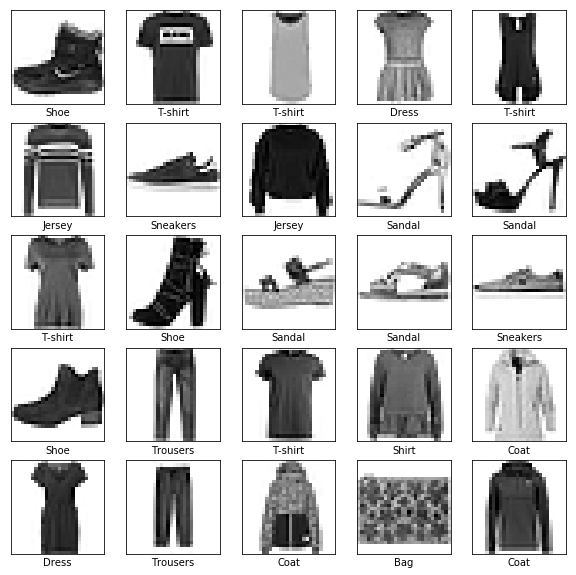

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    
    #adding labels:
    plt.xlabel(class_names[train_Y[i]])
plt.show()

The next thing we are going to do is change the shape of the images to adapt it to the input of the CNN:

In [10]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

En este caso hemos definido que los datos van a tener una forma de 28x28 píxeles y que únicamante tenemos un canal, que es el gris. En el caso de tener las imágenes en color podríamos cambiar el canal a 3 para tener la escala RGB típica de las imágenes a color

Lo siguiente es normalizar los datos de los píxeles entre 0 y 1. Recuerda que la codificación de los colores va entre 0 y 255, por lo que para normalizar estos datos bastará con convertirlos a tipo floar y dividirlos entre 255 para que cada píxel tome el valor entre 0 y 1

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

Next we are going to generate the one hot vector of the labels we mentioned above:

In [12]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

### MODEL CREATION

Once we have the data defined, it is time to create our model.

The first step is to define that you are going to work with a sequential model:

In [13]:
model = Sequential()

The following is to define each of the layers of the model:

The first layer will be a convolutional layer, with a data input of 28x28 as we have defined before. It will also consist of 64 neurons and a 3x3 convolutional filter

The next thing we will do is add an activation layer with a relu activation function.

The relu activation function is the one that is usually used in convolutional networks because it facilitates the training of the network due to its shape

In [14]:
model.add(Activation('relu'))

The next thing we do is add one more pooling layer with a size of 2x2

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

We are adding all the layers we want

In [16]:
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In the last layers we add a Flatten type (that is, it flattens all the output data of the previous layer into a vector)

Then we add two dense layers (the last one with as many neurons as classes we have in the dataset)

In [18]:
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

The softmax activation function gives us a distribution of the probability of belonging to each of the classes. It is the function we use for the last layer

Finally, we are going to tell the model based on what parameters it is going to train.

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

The function to optimize will be categorical_crossentropy. We will use it whenever we do multiclass classification problems

We use the Adam optimizer, which is the algorithm used to update the weights and the accuracy as a metric.

### MODEL TRAINING

The next step is to train the model by passing it the input data and the number of epochs during which we want the model to train the data. In addition, we are going to tell you to update the weights with gradient descent in batches of 64 images

In [20]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.5316 - accuracy: 0.8088
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.3916 - accuracy: 0.8591
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3616 - accuracy: 0.8678
Epoch 4/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.3403 - accuracy: 0.8772
Epoch 5/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.3271 - accuracy: 0.8813
Epoch 6/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.3130 - accuracy: 0.8863
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.3051 - accuracy: 0.8886
Epoch 8/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.2964 - accuracy: 0.8910
Epoch 9/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2891 - accuracy: 0.8938
Epoch 10/10
60000/60000 [============

### MODEL EVALUATION

Once the model has been trained, we will evaluate the error and precision of the model

In [22]:
train_loss, train_acc = model.evaluate(train_X, train_Y_one_hot)
print('Train loss', train_loss)
print('Train accuracy', train_acc)

60000/60000 [==============================] - 5s 85us/step
Train loss 0.26402916984359426
Train accuracy 0.9024999737739563


In [21]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 1s 81us/step
Test loss 0.3342352327823639
Test accuracy 0.8809000253677368
